In [1]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image, ImageFilter

import tifffile as tif

from skimage import io
from skimage.transform import resize

from structure_tensor import eig_special_2d, structure_tensor_2d
from utils.utilsST_2D import plot_orientations, polar_histogram, solve_flow

In [2]:
# ims_coral = io.imread("data/coral/MexCoral.tif")
ims_femur = tif.imread('data/femur/Femur.tif')
ims_femur.shape

(2454, 1030, 1429)

/Users/sebastianbitsch/Desktop/Bachelor/Code/SRGAN-ST/.env/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


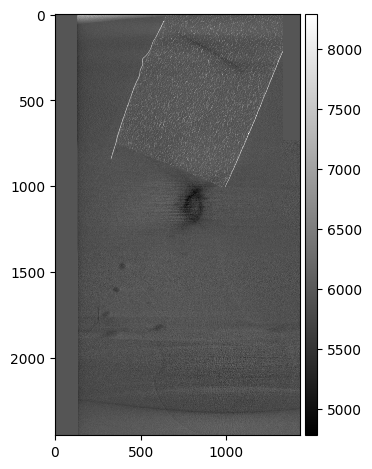

In [3]:
io.imshow(ims_femur[:,60,:], cmap="gray")
io.show()

In [91]:
def scale(val, src, dst):
    """ Scale the given value from the scale of src to the scale of dst. """
    return ((val - src[0]) / (src[1]-src[0])) * (dst[1]-dst[0]) + dst[0]

In [92]:
def make_lr(gt, downscale_factor = 4):
    w, h = gt.shape
    print(f"GT shape: {gt.shape}")

    lr = resize(gt, (w // downscale_factor, h // downscale_factor))
    print(f"LR shape: {lr.shape}")
    return lr

In [93]:
im_index = 300
downscale_factor = 8

gt_coral = ims_coral[im_index,:,:]
lr_coral = make_lr(gt_coral, downscale_factor)

gt_femur = ims_femur#[im_index,:,:]
gt_femur = gt_femur[151:,550:]
lr_femur = make_lr(gt_femur, downscale_factor)

GT shape: (1000, 1000)
LR shape: (125, 125)
GT shape: (879, 879)
LR shape: (109, 109)


In [94]:
fig, axs = plt.subplots(1,2)

names = ["Coral", "Femur"]
for i, im in enumerate([gt_coral, gt_femur]):
    axs[i].imshow(im, cmap="gray")
    axs[i].set_xticks([])
    axs[i].set_yticks([])

plt.gcf().set_dpi(2000)

In [95]:
io.imsave("gt_coral.png", gt_coral)#.astype("uint8"))
io.imsave("lr_coral.png", lr_coral)#.astype("uint8"))
io.imsave("gt_femur.png", gt_femur)#.astype("uint8"))
io.imsave("lr_femur.png", lr_femur)#.astype("uint8"))

# Structure tensors

In [107]:
im = gt_coral

In [108]:
import numpy as np
from structure_tensor import eig_special_2d, structure_tensor_2d

sigma = .5
rho = 2.5
N = 180

S = structure_tensor_2d(im, sigma, rho)
val, vec = eig_special_2d(S)

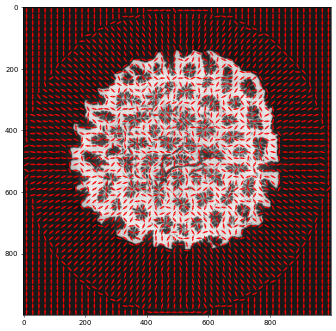

In [112]:
# visualization
figsize = (16,8)
fig, ax = plt.subplots(1, 1, figsize=figsize, sharex=True, sharey=True, dpi=50)
ax.imshow(im,cmap=plt.cm.gray)
plot_orientations(ax, im.shape, vec, s = 20)
# ax[0].set_title('Orientation as arrows')
# orientation_st_rgba = plt.cm.hsv((np.arctan2(vec[1], vec[0])/np.pi).reshape(im.shape))
# ax[1].imshow(plt.cm.gray(im)*orientation_st_rgba)
# ax[1].set_title('Orientation as color on im')
# ax[2].imshow(orientation_st_rgba)
# ax[2].set_title('Orientation as color')
# anisotropy = (1-val[0]/val[1]).reshape(im.shape)
# ax[3].imshow(anisotropy)
# ax[3].set_title('Degree of anisotropy')
# ax[4].imshow(plt.cm.gray(anisotropy)*orientation_st_rgba)
# ax[4].set_title('Orientation and anisotropy')

# plt.gcf().set_dpi(1000)
plt.show()

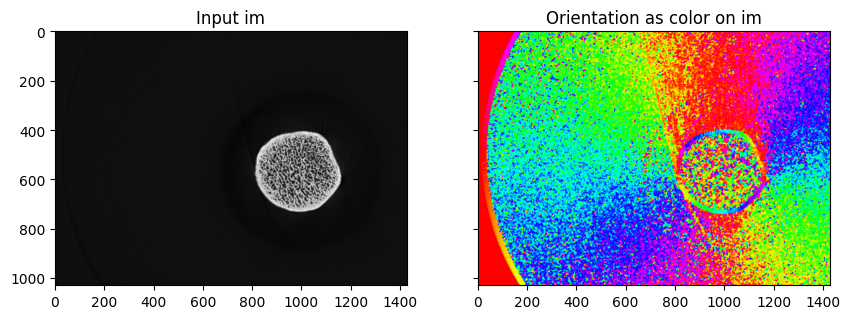

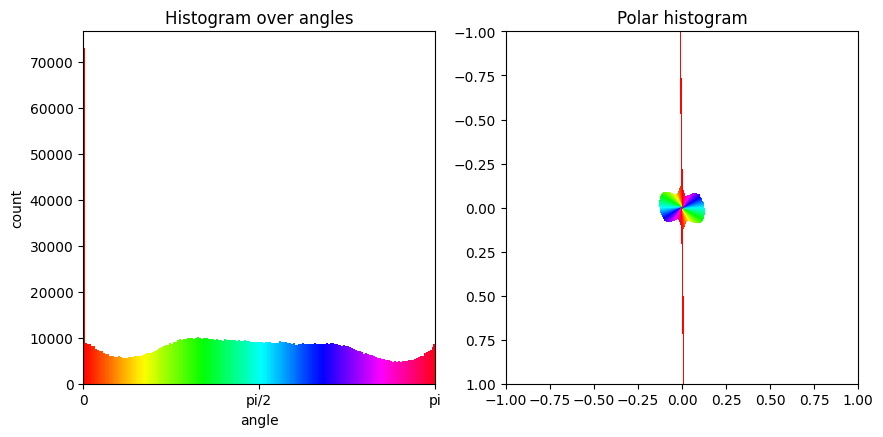

In [19]:
angles = np.arctan2(vec[1], vec[0]) # angles from 0 to pi
distribution = np.histogram(angles, bins=N, range=(0.0, np.pi))[0]

# visualization
figsize = (10,5)
fig, ax = plt.subplots(1, 2, figsize=figsize, sharex=True, sharey=True)
ax[0].imshow(im,cmap=plt.cm.gray)
ax[0].set_title('Input im')
orientation_st_rgba = plt.cm.hsv((angles/np.pi).reshape(im.shape))
ax[1].imshow(plt.cm.gray(im)*orientation_st_rgba)
ax[1].set_title('Orientation as color on im')

fig, ax = plt.subplots(1,2, figsize=figsize)
bin_centers = (np.arange(N)+0.5)*np.pi/N # halp circle (180 deg)
colors = plt.cm.hsv(bin_centers/np.pi)
ax[0].bar(bin_centers, distribution, width = np.pi/N, color = colors)
ax[0].set_xlabel('angle')
ax[0].set_xlim([0,np.pi])
ax[0].set_aspect(np.pi/ax[0].get_ylim()[1])
ax[0].set_xticks([0,np.pi/2,np.pi])
ax[0].set_xticklabels(['0','pi/2','pi'])
ax[0].set_ylabel('count')
ax[0].set_title('Histogram over angles')
polar_histogram(ax[1], distribution)
ax[1].set_title('Polar histogram')
plt.show()

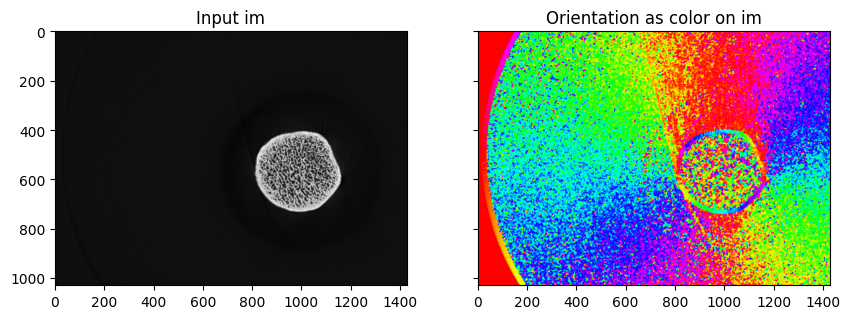

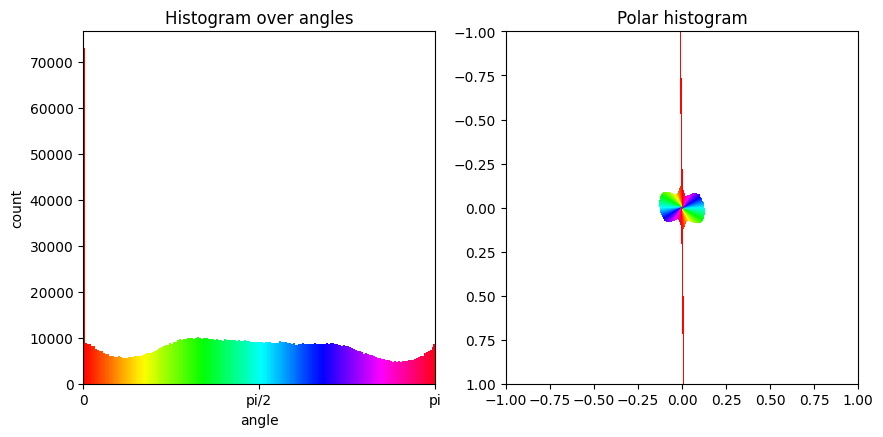

In [20]:
# visualization
figsize = (10,5)
fig, ax = plt.subplots(1, 2, figsize=figsize, sharex=True, sharey=True)
ax[0].imshow(im,cmap=plt.cm.gray)
ax[0].set_title('Input im')
orientation_st_rgba = plt.cm.hsv((angles/np.pi).reshape(im.shape))
ax[1].imshow(plt.cm.gray(im)*orientation_st_rgba)
ax[1].set_title('Orientation as color on im')

fig, ax = plt.subplots(1,2, figsize=figsize)
bin_centers = (np.arange(N)+0.5)*np.pi/N # halp circle (180 deg)
colors = plt.cm.hsv(bin_centers/np.pi)
ax[0].bar(bin_centers, distribution, width = np.pi/N, color = colors)
ax[0].set_xlabel('angle')
ax[0].set_xlim([0,np.pi])
ax[0].set_aspect(np.pi/ax[0].get_ylim()[1])
ax[0].set_xticks([0,np.pi/2,np.pi])
ax[0].set_xticklabels(['0','pi/2','pi'])
ax[0].set_ylabel('count')
ax[0].set_title('Histogram over angles')
polar_histogram(ax[1], distribution)
ax[1].set_title('Polar histogram')
plt.show()

# Femur